# Initiering

In [1]:
% reset
# Initiering
# Import packages
import json
import sympy
import numpy
import matplotlib.pyplot as plt
from sympy import *
from matplotlib.pyplot import *
init_printing()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Mundell-Fleming modellen

In [2]:
# Declaring variables
## Endogenous
Y, C, I, G, Ld, Ms, P, M, NX, R, IM, EX, E = sympy.symbols('Y C I G L_d M_s  P M NX R IM EX E')
## Parametere og konstantledd
oC, c1, b, oI, k, h, t, m, m1, m2, x1, x2, P, Ps = sympy.symbols('oC c_1 b oI k h t m m1 m2 x1 x2 P Ps')
## Exogene styringsvariableh
oG, i, T, Ys, rp, i_s = sympy.symbols('oG i T Ys rp i_s')

In [3]:
beforems = set(dir())
## Markeder
## Offentlig markeder
### Varemarkedet
EQV = Eq(Y, C + I + G + NX*0)
### Pengemarkedet
EQM = Eq(Ld, Ms)
### Valutakursmarkedet
EQU = Eq(i,i_s + rp)

## Aktører
### Husholdningero
#### Konsumfunksjon
CD = Eq(C,oC + c1*(Y-T))
CDI = Eq(IM, -m1*R + m2*Y)

#### Pengeetterspørsel
LD = Eq(Ld,k*Y-h*i)
### Bedrifter
#YS = Eq(Ys, Y)
YSE = Eq(EX, x1*R + x2*Ys)

#### Investeringer
ID = Eq(Id,oI - b*i)

### Offentlig myndigheter
GD = Eq(G, oG)
TR = Eq(T, t*Y)
### Sentralbanken
MS = Eq(Ms,M)


### Definisjoner
DNX = Eq(NX, R*EX - IM)
DRE = Eq(R,(E*Ps)/P)

RNX = DNX.subs([(IM, solve(CDI.subs([(R,solve(DRE,R)[0])]), IM) [0]
),(EX, solve(YSE.subs([(R,solve(DRE,R)[0])]), EX)[0])])

## Løsning av modellen
## IS
#ISC = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD.subs(T,solve(TR,T)[0]),C)[0]), (I, solve(ID, Id)[0]), (NX, solve(RNX, NX)[0])]), Y)[0])
ISC = Eq(Y,solve(EQV.subs([(G, solve(GD, G)[0]),(C,solve(CD, C)[0]), (I, solve(ID, Id)[0]), (NX, solve(RNX, NX)[0])]), Y)[0])

## LM
LMC = Eq(Y,solve(EQM.subs([(Ms, solve(MS,Ms)[0]),(Ld,solve(LD,Ld)[0])]),Y)[0])
## BP-fast kurs
BPCFA = Eq(i,i_s + rp)
## BP-fast kurs
BPCFL = Eq(i,i_s + rp)
## Likvekt 
SEQi=Eq(i,solve(LMC.subs(Y,solve(ISC,Y)[0]),i)[0])
SEQY=Eq(Y,solve(ISC.subs(i,solve(LMC,i)[0]),Y)[0])
afterms = set(dir())

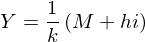

In [4]:
modvardict = list(afterms - beforems)
modvardict.remove('beforems')
#
modlatequ = dict()
modequ = dict()

for teller in range(0,len(modvardict)):
    eqvar = modvardict[teller]
    modlatequ[eqvar] = latex(eval(modvardict[teller]))
    modequ[eqvar] = str(eval(modvardict[teller]).rhs)
   
expdeftex = open('islmoctex.json', 'w')
json.dump(modlatequ,expdeftex)
expdeftex.close()
expdefequ = open('islmocequ.json', 'w')
json.dump(modequ,expdefequ)
expdefequ.close()
modvardict

['LMC',
 'SEQi',
 'DRE',
 'EQU',
 'DNX',
 'BPCFL',
 'EQM',
 'YSE',
 'ID',
 'ISC',
 'MS',
 'SEQY',
 'CD',
 'TR',
 'LD',
 'CDI',
 'RNX',
 'GD',
 'BPCFA',
 'EQV']